<a href="https://colab.research.google.com/github/blacksant0145/tareas/blob/main/taller_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dado el siguiente conjunto de valores: [15, 6, 3, 9, 18, 20, 17], realiza las siguientes tareas:

Construye el árbol binario de búsqueda utilizando estos valores.
Representa el árbol en una gráfica con una disposición jerárquica.
Muestra en consola los recorridos Inorden, Preorden, y Postorden del árbol.
Y eliminar la raíz teniendo un precesor y un sucesor con recorrido inorden



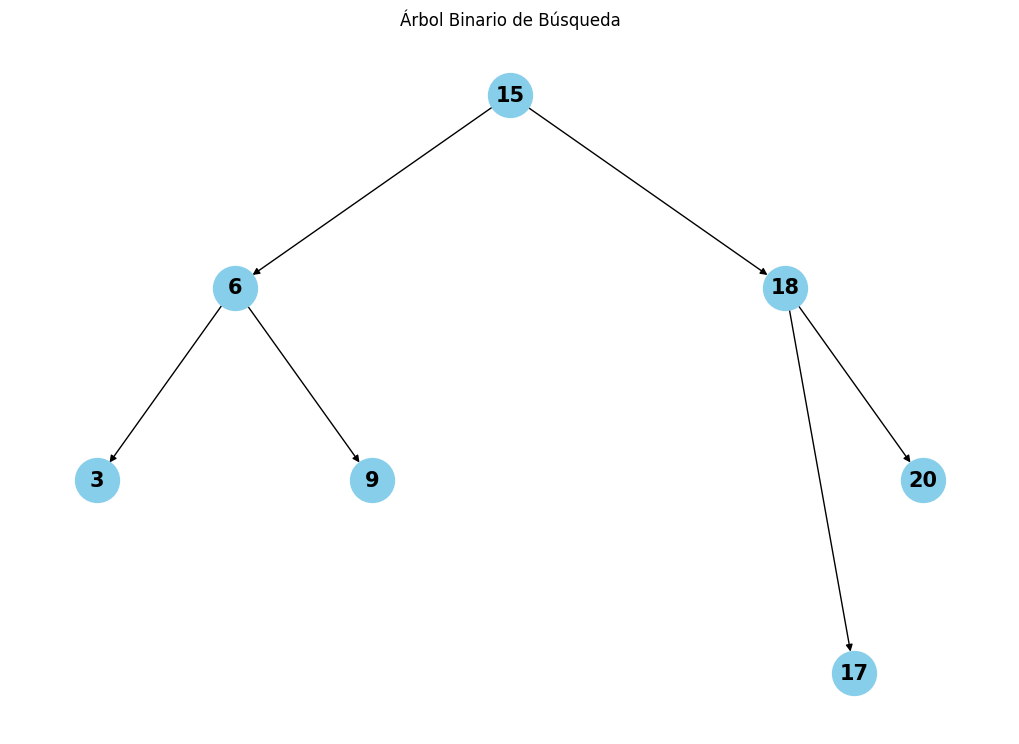

Recorrido Inorden: [3, 6, 9, 15, 17, 18, 20]
Recorrido Preorden: [15, 6, 3, 9, 18, 17, 20]
Recorrido Postorden: [3, 9, 6, 17, 20, 18, 15]

Eliminando la raíz (15) usando el predecesor...
Recorrido Inorden después de eliminar la raíz: [3, 6, 9, 17, 18, 20]
Recorrido Preorden después de eliminar la raíz: [9, 6, 3, 18, 17, 20]
Recorrido Postorden después de eliminar la raíz: [3, 6, 17, 20, 18, 9]


In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# Definir la clase de nodo para el árbol binario de búsqueda
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# Función para insertar valores en el árbol binario de búsqueda
def insert(root, value):
    if root is None:
        return Node(value)
    if value < root.value:
        root.left = insert(root.left, value)
    else:
        root.right = insert(root.right, value)
    return root

# Crear el árbol con los valores especificados
values =  [15, 6, 3, 9, 18, 20, 17]
root = None
for value in values:
    root = insert(root, value)

# Crear el gráfico del árbol binario de búsqueda
def add_edges(graph, node):
    if node is not None:
        if node.left is not None:
            graph.add_edge(node.value, node.left.value)
            add_edges(graph, node.left)
        if node.right is not None:
            graph.add_edge(node.value, node.right.value)
            add_edges(graph, node.right)

# Crear el gráfico y agregar nodos y aristas
G = nx.DiGraph()
add_edges(G, root)

# Definir posiciones específicas para cada nodo, imitando la disposición de la imagen

pos = {
    15: (0, 0),
    6: (-1, -1),
    18: (1, -1),
    3: (-1.5, -2),
    9: (-0.5, -2),
    20: (1.5, -2),
    17: (1.25, -3)
}

# Dibujar el gráfico
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=15, font_weight="bold", arrows=True)
plt.title("Árbol Binario de Búsqueda")
plt.show()

# Definir el recorrido inorden
def inorden(node):
    if node is None:
        return []
    return inorden(node.left) + [node.value] + inorden(node.right)

# Definir el recorrido preorden
def preorden(node):
    if node is None:
        return []
    return [node.value] + preorden(node.left) + preorden(node.right)

# Definir el recorrido postorden
def postorden(node):
    if node is None:
        return []
    return postorden(node.left) + postorden(node.right) + [node.value]

# Función para encontrar el predecesor inorden
def find_predecessor(node):
    current = node.left
    while current and current.right:
        current = current.right
    return current

# Función para encontrar el sucesor inorden
def find_successor(node):
    current = node.right
    while current and current.left:
        current = current.left
    return current

# Función para eliminar un nodo del árbol binario de búsqueda
def delete_node(root, value):
    if root is None:
        return root
    if value < root.value:
        root.left = delete_node(root.left, value)
    elif value > root.value:
        root.right = delete_node(root.right, value)
    else:
        # Nodo encontrado
        if root.left is None:  # Sin hijo izquierdo
            return root.right
        elif root.right is None:  # Sin hijo derecho
            return root.left

        # Caso con dos hijos
        # Usar predecesor (máximo en el subárbol izquierdo)
        predecessor = find_predecessor(root)
        root.value = predecessor.value
        root.left = delete_node(root.left, predecessor.value)

    return root
# Mostrar los recorridos
print("Recorrido Inorden:", inorden(root))
print("Recorrido Preorden:", preorden(root))
print("Recorrido Postorden:", postorden(root))

# Eliminar la raíz y mostrar el árbol actualizado
print("\nEliminando la raíz (15) usando el predecesor...")
root = delete_node(root, 15)

# Mostrar los recorridos después de eliminar la raíz
print("Recorrido Inorden después de eliminar la raíz:", inorden(root))
print("Recorrido Preorden después de eliminar la raíz:", preorden(root))
print("Recorrido Postorden después de eliminar la raíz:", postorden(root))


El árbol binario generado con los valores [10, 5, 15, 2, 7, 12, 18] produce el siguiente recorrido Inorden: [2, 5, 7, 10, 12, 15, 18].

Verifica que el recorrido Inorden es correcto, simulando el proceso de recorrido paso a paso.
Escribe los recorridos Preorden y Postorden del mismo árbol.
Explica cómo los recorridos pueden ser utilizados para reconstruir el árbol.
Y eliminar la raíz teniendo un precesor y un sucesor con recorrido inorden


RTA:
el recorrido inorden esta correcto

RTA:
Los recorridos Preorden, Inorden y Postorden pueden ser utilizados en conjunto para reconstruir un árbol binario. Preorden y Postorden nos dicen cuál es la raíz, y Inorden nos permite dividir el árbol en subárboles izquierdo y derecho. Estos recorridos son fundamentales para comprender la estructura y organización de los árboles binarios.

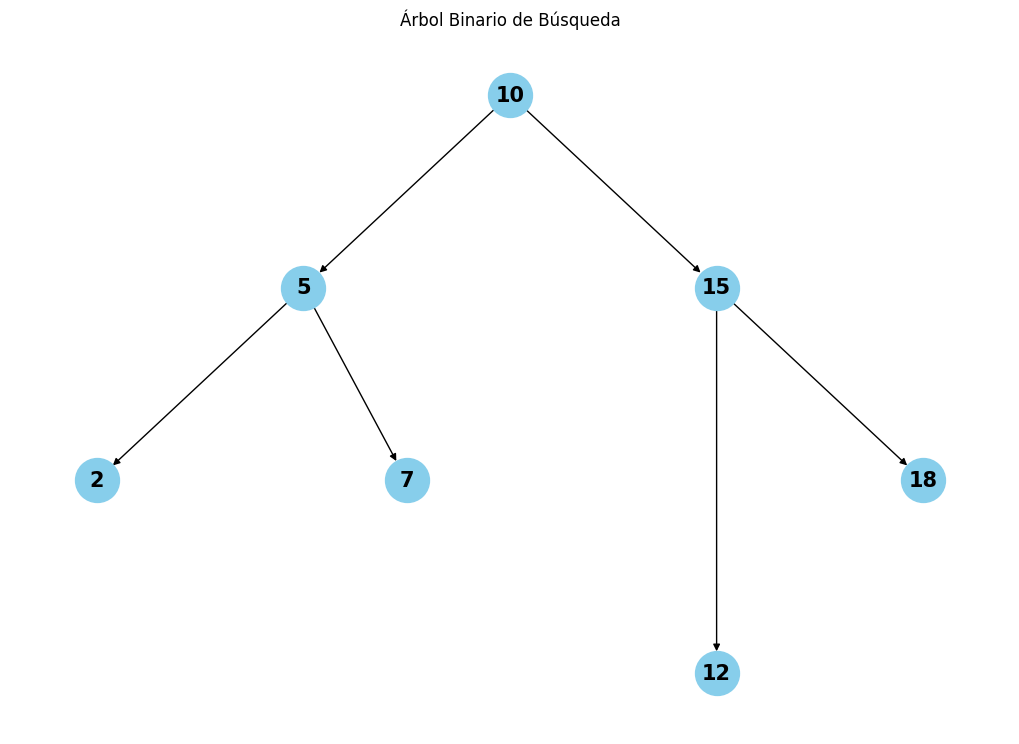

Recorrido Preorden: [10, 5, 2, 7, 15, 12, 18]
Recorrido Postorden: [2, 7, 5, 12, 18, 15, 10]
Recorrido Inorden: [2, 5, 7, 10, 12, 15, 18]


In [26]:
import matplotlib.pyplot as plt
import networkx as nx

# Definir la clase de nodo para el árbol binario de búsqueda
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# Función para insertar valores en el árbol binario de búsqueda
def insert(root, value):
    if root is None:
        return Node(value)
    if value < root.value:
        root.left = insert(root.left, value)
    else:
        root.right = insert(root.right, value)
    return root

# Crear el árbol con los valores especificados
values = [10, 5, 15, 2, 7, 12, 18]
root = None
for value in values:
    root = insert(root, value)

# Crear el gráfico del árbol binario de búsqueda
def add_edges(graph, node):
    if node is not None:
        if node.left is not None:
            graph.add_edge(node.value, node.left.value)
            add_edges(graph, node.left)
        if node.right is not None:
            graph.add_edge(node.value, node.right.value)
            add_edges(graph, node.right)

# Crear el gráfico y agregar nodos y aristas
G = nx.DiGraph()
add_edges(G, root)

# Definir posiciones específicas para cada nodo, imitando la disposición de la imagen

pos = {
    10: (0, 0),
    5: (-1, -1),
    15: (1, -1),
    2: (-2, -2),
    18: (2, -2),
    7: (-0.5, -2),
    12: (1, -3),
}

# Dibujar el gráfico
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=15, font_weight="bold", arrows=True)
plt.title("Árbol Binario de Búsqueda")
plt.show()

# Definir el recorrido preorden
def preorden(node):
    if node is None:
        return []
    return [node.value] + preorden(node.left) + preorden(node.right)

# Definir el recorrido postorden
def postorden(node):
    if node is None:
        return []

    return postorden(node.left) + postorden(node.right) + [node.value]
# Función para encontrar el sucesor inorden
def find_successor(node):
    current = node.right
    while current and current.left:
        current = current.left
    return current

#mostrar los recorridos
print("Recorrido Preorden:", preorden(root))
print("Recorrido Postorden:", postorden(root))
print("Recorrido Inorden:", inorden(root))

# Función para encontrar el predecesor inorden
def find_predecessor(node):
    current = node.left
    while current and current.right:
        current = current.right
    return current

# Función para encontrar el sucesor inorden
def find_successor(node):
    current = node.right
    while current and current.left:
        current = current.left
    return current

# Función para eliminar un nodo del árbol binario de búsqueda
def delete_node(root, value):
    if root is None:
        return root
    if value < root.value:
        root.left = delete_node(root.left, value)
    elif value > root.value:
        root.right = delete_node(root.right, value)
    else:
        # Nodo encontrado
        if root.left is None:  # Sin hijo izquierdo
            return root.right
        elif root.right is None:  # Sin hijo derecho
            return root.left

        # Caso con dos hijos
        # Usar predecesor (máximo en el subárbol izquierdo)
        predecessor = find_predecessor(root)
        root.value = predecessor.value
        root.left = delete_node(root.left, predecessor.value)

    return root
# Eliminar la raíz y mostrar el árbol actualizado
print("\nEliminando la raíz (15) usando el predecesor...")
root = delete_node(root, 10)

# Mostrar los recorridos después de eliminar la raíz
print("Recorrido Inorden después de eliminar la raíz:", inorden(root))
print("Recorrido Preorden después de eliminar la raíz:", preorden(root))
print("Recorrido Postorden después de eliminar la raíz:", postorden(root))

Se presentan los siguientes recorridos de un árbol binario:

Preorden: [8, 3, 1, 6, 4, 7, 10, 14, 13]

Inorden: [1, 3, 4, 6, 7, 8, 10, 13, 14]

Dibuja manualmente el árbol binario de búsqueda correspondiente a estos recorridos.
Implementa un programa para validar tu dibujo generando el árbol a partir de los recorridos dados.
Grafica el árbol obtenido y verifica que sea igual al dibujado manualmente.
Y eliminar la raíz teniendo un precesor y un sucesor con recorrido inorden




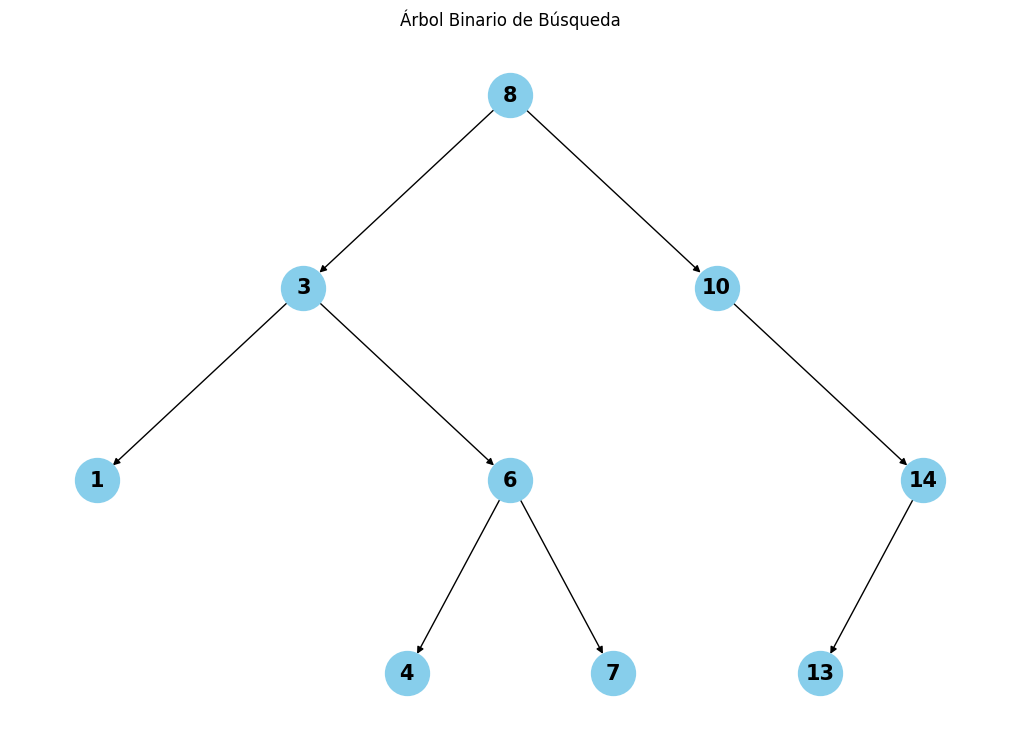

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Definir la clase de nodo para el árbol binario de búsqueda
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# Función para insertar valores en el árbol binario de búsqueda
def insert(root, value):
    if root is None:
        return Node(value)
    if value < root.value:
        root.left = insert(root.left, value)
    else:
        root.right = insert(root.right, value)
    return root

# Crear el árbol con los valores especificados
values =  [8, 3, 1, 6, 4, 7, 10, 14, 13]
root = None
for value in values:
    root = insert(root, value)

# Crear el gráfico del árbol binario de búsqueda
def add_edges(graph, node):
    if node is not None:
        if node.left is not None:
            graph.add_edge(node.value, node.left.value)
            add_edges(graph, node.left)
        if node.right is not None:
            graph.add_edge(node.value, node.right.value)
            add_edges(graph, node.right)

# Crear el gráfico y agregar nodos y aristas
G = nx.DiGraph()
add_edges(G, root)

# Definir posiciones específicas para cada nodo, imitando la disposición de la imagen

pos = {
    8: (0, 0),
    3: (-1, -1),
    10: (1, -1),
    1: (-2, -2),
    6: (0, -2),
    14: (2, -2),
    4: (-0.5, -3),
    7: (0.5, -3),
    13: (1.5, -3),
}

# Dibujar el gráfico
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=15, font_weight="bold", arrows=True)
plt.title("Árbol Binario de Búsqueda")
plt.show()

# Función para encontrar el predecesor inorden (mayor valor en el subárbol izquierdo)
def find_predecessor(node):
    current = node.left
    while current and current.right:
        current = current.right
    return current

# Función para encontrar el sucesor inorden (menor valor en el subárbol derecho)
def find_successor(node):
    current = node.right
    while current and current.left:
        current = current.left
    return current

# Función para eliminar la raíz utilizando el predecesor o sucesor
def delete_root(root, use_predecessor=True):
    if root is None:
        return None

    # Caso sin hijos o un solo hijo: devolver directamente el subárbol no nulo
    if root.left is None:
        return root.right
    if root.right is None:
        return root.left

    # Caso con dos hijos
    if use_predecessor:  # Utilizar el predecesor
        predecessor = find_predecessor(root)
        root.value = predecessor.value
        root.left = delete_node(root.left, predecessor.value)
    else:  # Utilizar el sucesor
        successor = find_successor(root)
        root.value = successor.value
        root.right = delete_node(root.right, successor.value)

    return root

# Función auxiliar para eliminar un nodo (ya definida anteriormente)
def delete_node(root, value):
    if root is None:
        return root
    if value < root.value:
        root.left = delete_node(root.left, value)
    elif value > root.value:
        root.right = delete_node(root.right, value)
    else:
        # Nodo encontrado
        if root.left is None:
            return root.right
        if root.right is None:
            return root.left

        # Caso con dos hijos, usar predecesor por defecto
        predecessor = find_predecessor(root)
        root.value = predecessor.value
        root.left = delete_node(root.left, predecessor.value)
    return root

# Supongamos que tienes un árbol binario con raíz 'root'
print("Recorrido Inorden antes de eliminar la raíz:", inorden(root))

# Eliminar la raíz usando el predecesor
print("\nEliminando la raíz usando el predecesor...")
root = delete_root(root, use_predecessor=True)
print("Recorrido Inorden después de eliminar la raíz:", inorden(root))

# Eliminar la nueva raíz usando el sucesor
print("\nEliminando la raíz usando el sucesor...")
root = delete_root(root, use_predecessor=False)
print("Recorrido Inorden después de eliminar la raíz:", inorden(root))


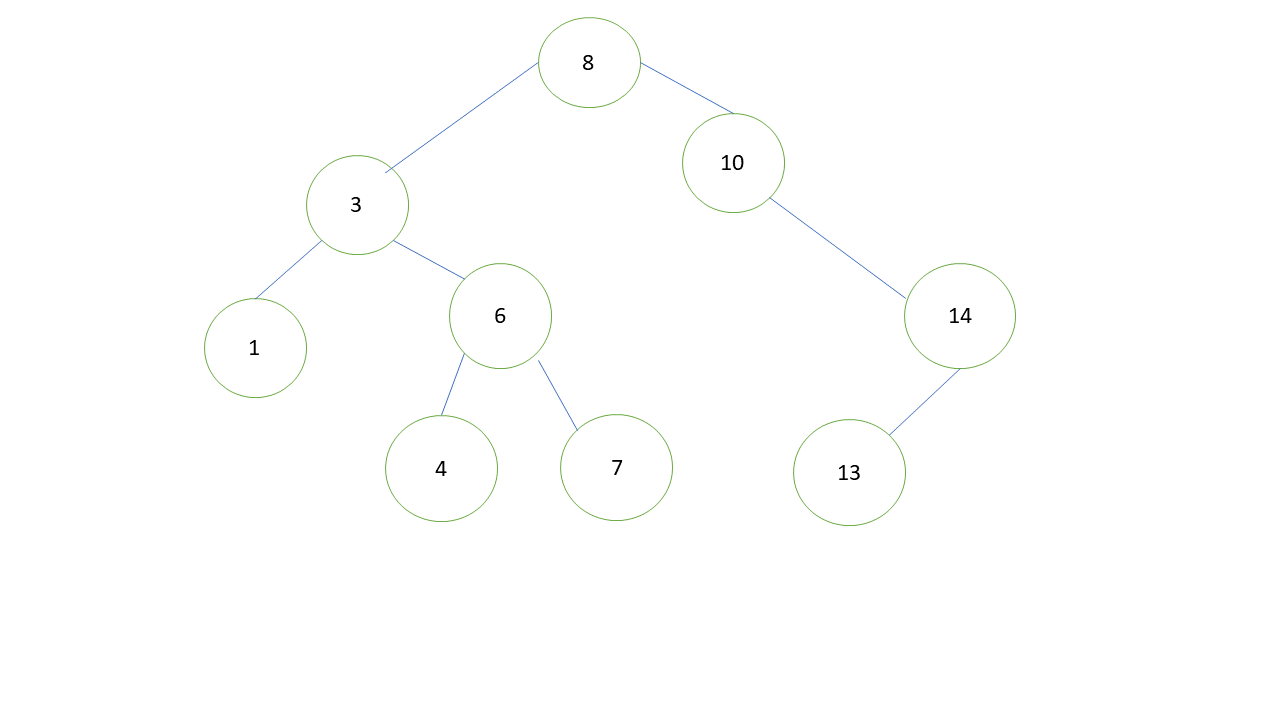